### Analysis Given Data

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from solve_m_height_cpp import solveMHeight_glpk
import time

from data_loader_saver import load_data, save_data


In [8]:
m_h_datapath = "../data/project/DS-15-samples_mHeights"
n_k_m_datapath = "../data/project/DS-15-samples_n_k_m_P"

m_h_datapath_1 = "../data/project/training_samples_m_h.pkl"
n_k_m_datapath_1 = "../data/project/training_samples_n_k_m_G.pkl"

In [9]:
n_k_m_P, m_heights = load_data(n_k_m_datapath, m_h_datapath)
n_k_m_P_1, m_heights_1 = load_data(n_k_m_datapath_1, m_h_datapath_1)

n_k_m_P.extend(n_k_m_P_1)
m_heights.extend(m_heights_1)

# quick sanity checks
print(f'm_heights type: {type(m_heights)}, length: {len(m_heights)}')
print(f'n_k_m type: {type(n_k_m_P)}, length: {len(n_k_m_P)}')

print(f'First 5 m_heights: \n{m_heights[0]}')
print(f'First 5 n_k_m: \n{n_k_m_P[0]}')

print(f'num samples:{len(m_heights)}, {len(n_k_m_P)}')

k = n_k_m_P[0][1]
#create identity matrix of size k by k
I_k = np.eye(k)

print(f'Identity matrix shape: {I_k.shape}')

#construct G matrix as I_k | M
M = n_k_m_P[0][3]
G = np.hstack((I_k, M))

print(f'G matrix shape: {G.shape}')
print(f'G matrix: \n{G}')

m = n_k_m_P[0][2]
m_h_calc = solveMHeight_glpk(G, m)[0]

print(f'Calculated m_height: \n{m_h_calc}')
print(f'Given m_height: \n{m_heights[0]}')

m_heights type: <class 'list'>, length: 122087
n_k_m type: <class 'list'>, length: 122087
First 5 m_heights: 
11.472222222222221
First 5 n_k_m: 
[9, 4, 2, array([[ 1, -2,  2, -1,  4],
       [ 3,  0, -2,  1,  3],
       [ 0,  4,  4,  4,  3],
       [-3, -1,  4,  1, -4]])]
num samples:122087, 122087
Identity matrix shape: (4, 4)
G matrix shape: (4, 9)
G matrix: 
[[ 1.  0.  0.  0.  1. -2.  2. -1.  4.]
 [ 0.  1.  0.  0.  3.  0. -2.  1.  3.]
 [ 0.  0.  1.  0.  0.  4.  4.  4.  3.]
 [ 0.  0.  0.  1. -3. -1.  4.  1. -4.]]
Calculated m_height: 
11.472222222222223
Given m_height: 
11.472222222222221


In [10]:
from collections import Counter

combo_counter = Counter()
combo_stats = {}
for sample in n_k_m_P:
    n_k_m = tuple(sample[:3])
    G_values = np.asarray(sample[3])
    combo_counter[n_k_m] += 1

    g_min = G_values.min()
    g_max = G_values.max()
    if n_k_m not in combo_stats:
        combo_stats[n_k_m] = {'min': g_min, 'max': g_max}
    else:
        combo_stats[n_k_m]['min'] = min(combo_stats[n_k_m]['min'], g_min)
        combo_stats[n_k_m]['max'] = max(combo_stats[n_k_m]['max'], g_max)

unique_n_k_m = list(combo_counter.keys())
unique_n_k_m_count = list(combo_counter.values())

print(f'Number of unique (n, k, m) combinations: {len(unique_n_k_m)}')
print(f'Unique (n, k, m) combinations: {unique_n_k_m}')
print('Counts and G stats per (n, k, m):')
for combo in unique_n_k_m:
    count = combo_counter[combo]
    g_min = combo_stats[combo]['min']
    g_max = combo_stats[combo]['max']
    print(f'{combo}: count={count}, G_min={g_min}, G_max={g_max}')



Number of unique (n, k, m) combinations: 9
Unique (n, k, m) combinations: [(9, 4, 2), (9, 4, 3), (9, 4, 4), (9, 4, 5), (9, 5, 2), (9, 5, 3), (9, 5, 4), (9, 6, 2), (9, 6, 3)]
Counts and G stats per (n, k, m):
(9, 4, 2): count=12677, G_min=-100, G_max=100
(9, 4, 3): count=12588, G_min=-100, G_max=100
(9, 4, 4): count=12376, G_min=-100, G_max=100
(9, 4, 5): count=11494, G_min=-100, G_max=100
(9, 5, 2): count=13579, G_min=-100, G_max=100
(9, 5, 3): count=13286, G_min=-100, G_max=100
(9, 5, 4): count=12002, G_min=-100, G_max=100
(9, 6, 2): count=19336, G_min=-100, G_max=100
(9, 6, 3): count=14749, G_min=-100, G_max=100


Max m-height: 18207951.00036829
Min m-height: 2.0
Max m-height: 18207951.00036829
Min m-height: 2.0

Per (n,k,m) m-height stats:
(9, 4, 2): count=12677, min=2, mean=134.824, max=493.14
(9, 4, 3): count=12588, min=3, mean=265.246, max=5164.54
(9, 4, 4): count=12376, min=7, mean=1144.48, max=49407.6
(9, 4, 5): count=11494, min=25, mean=51607.8, max=1.8208e+07
(9, 5, 2): count=13579, min=3, mean=285.32, max=3413.05
(9, 5, 3): count=13286, min=6, mean=1247.93, max=42991.3
(9, 5, 4): count=12002, min=31, mean=64399.3, max=1.52515e+07
(9, 6, 2): count=19336, min=5, mean=632.782, max=31072.6
(9, 6, 3): count=14749, min=37, mean=30974.5, max=2.85824e+06


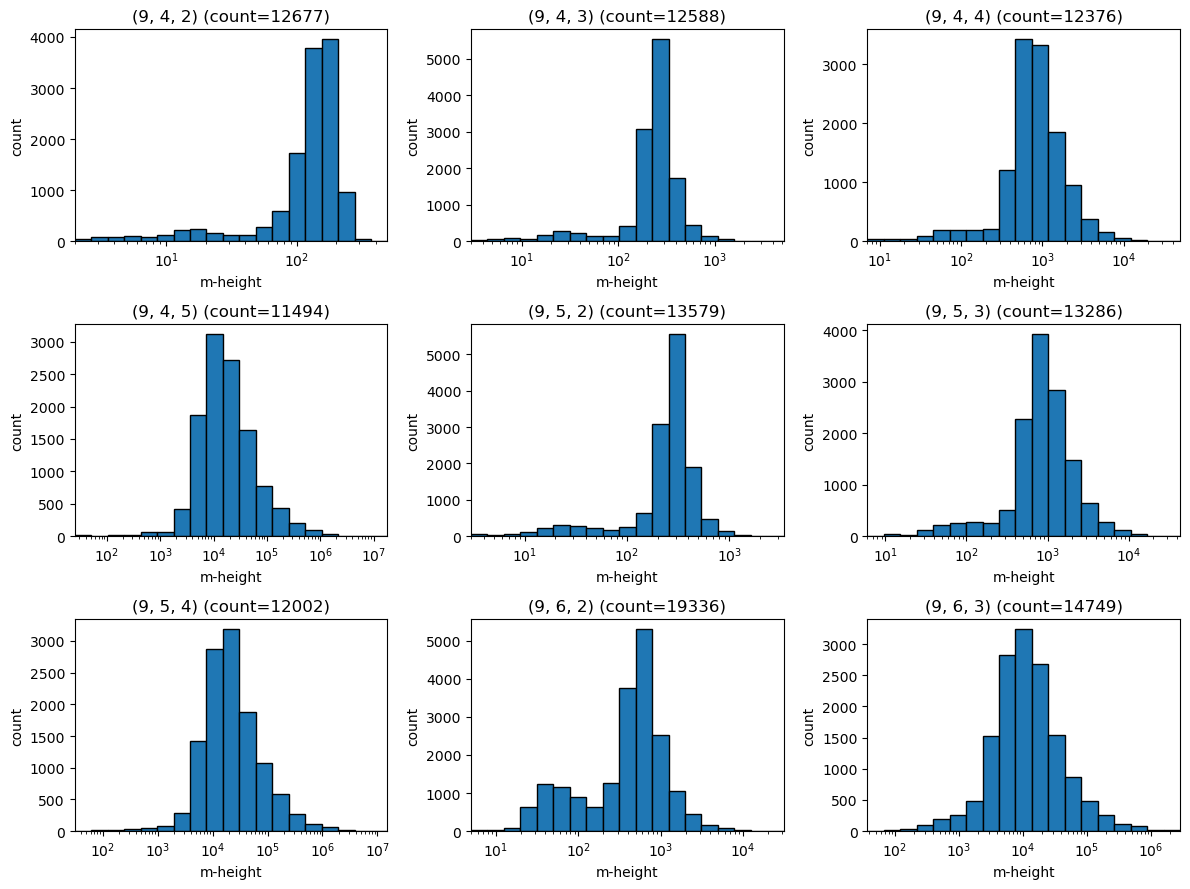

In [11]:
print(f'Max m-height: {max(m_heights)}')
print(f'Min m-height: {min(m_heights)}')

print(f'Max m-height: {max(m_heights)}')
print(f'Min m-height: {min(m_heights)}')

# aggregate m-heights by (n,k,m) tuple and show stats + plots
from collections import defaultdict
import math

m_by_combo = defaultdict(list)
for idx, sample in enumerate(n_k_m_P):
    key = tuple(sample[:3])
    val = m_heights[idx]
    arr = np.array(val)
    # if m-height is multi-valued, reduce to mean for plotting summary
    m_val = float(arr.mean()) if arr.size > 1 else float(arr)
    m_by_combo[key].append(m_val)

print("\nPer (n,k,m) m-height stats:")
for key, vals in m_by_combo.items():
    a = np.array(vals)
    print(f"{key}: count={len(vals)}, min={a.min():.6g}, mean={a.mean():.6g}, max={a.max():.6g}")

# plotting with log x-axis, ensuring leftmost = min, rightmost = max for each combo
n_plots = len(m_by_combo)
if n_plots == 0:
    print("No (n,k,m) combos found to plot.")
else:
    cols = 3
    rows = math.ceil(n_plots / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, max(3, rows * 3)))
    axs = np.array(axs).reshape(-1)  # flatten (works for single row/col)
    for ax in axs:
        ax.clear()
    for i, (key, vals) in enumerate(m_by_combo.items()):
        ax = axs[i]
        vals_arr = np.array(vals)
        # prepare data for log scale: keep only positive values
        positive = vals_arr[vals_arr > 0]
        if positive.size >= 2:
            min_v = positive.min()
            max_v = positive.max()
            # protect against min==max or extremely small values
            if min_v == max_v:
                if min_v == 0:
                    min_v = 1e-6
                    max_v = 1e-3
                else:
                    min_v = min_v * 0.9
                    max_v = max_v * 1.1
            bins_count = min(20, max(5, len(np.unique(np.round(positive, 8)))))
            bins = np.logspace(np.log10(min_v), np.log10(max_v), num=bins_count)
            ax.hist(positive, bins=bins, edgecolor='black')
            ax.set_xscale('log')
            ax.set_xlim(min_v, max_v)
        else:
            # fallback to linear histogram if insufficient positive data
            bins = min(20, max(5, len(np.unique(np.round(vals_arr, 8)))))
            ax.hist(vals_arr, bins=bins, edgecolor='black')
        ax.set_title(f"{key} (count={len(vals)})")
        ax.set_xlabel("m-height")
        ax.set_ylabel("count")
    # turn off any unused axes
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    plt.tight_layout()
    plt.show()

### Generate Training Set

Since we don't have enough data for each n_k_m pair, we will generate more data for each unique m_k_m pair so that we have can train a seperate neural network for each n_k_m pair. 


In [ ]:
from run_gen_data_set import gen_training_samples

start_time = time.time()
n_k_m_G_samples, m_h_samples = gen_training_samples(9, 4, 2, 100)
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
print(f'{n_k_m_G_samples[0], m_h_samples[0]}')